#### Question-1

### GroupName-P2iota
#### Groupmembers:
#### 1) Parth Mishra
#### 2)Nagaharshitha

In [ ]:
import pandas as pd
from itertools import chain
import numpy as np
import nltk
from nltk.corpus import PlaintextCorpusReader
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler

In [ ]:
college=pd.read_csv("college_data.csv")
college.rename(columns = {'ShortHandName':'school'}, inplace = True)
scaler = StandardScaler()
scaler.fit(college.iloc[:,3:22])
collegeScaled = scaler.transform(college.iloc[:,3:22])

### Part-B

### College Data

#### Question-4(a)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(collegeScaled)


In [ ]:
principalDf=pd.DataFrame(data=principalComponents,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18'])
finalDf=pd.concat([principalDf,college[['school']]],axis=1)

#### Question-4(b)

0     Text(-0.8230555288638913, -0.6895640762666552,...
1     Text(-4.306220437140875, -0.28536320539542476,...
2     Text(-4.872177991833646, -0.1989286862346867, ...
3     Text(2.3841351216158087, -2.4611945290073303, ...
4     Text(4.891552942611183, 0.3993857996318111, 'C...
5     Text(-3.4654443637616925, 0.1693640663671069, ...
6     Text(4.259102413894574, -2.2610989848733642, '...
7     Text(-2.94975111080373, -2.2812982762499976, '...
8     Text(-4.669256693469337, -0.4330325843694707, ...
9     Text(2.9182086940394893, 2.9913316254346096, '...
10    Text(3.860785978785302, -0.11212236608168434, ...
11    Text(-3.808547037256667, 0.9503497071313666, '...
12    Text(-2.9223423681329614, 0.30707378140562097,...
13    Text(5.823642093687627, -0.8581826179361897, '...
14    Text(2.7641576624962285, 1.1037360984939435, '...
15    Text(0.200868717094603, 1.6568448776668714, 'U...
16    Text(0.6596557464027369, 0.5285976434985383, '...
17    Text(-0.16879992533131408, -0.259583211226

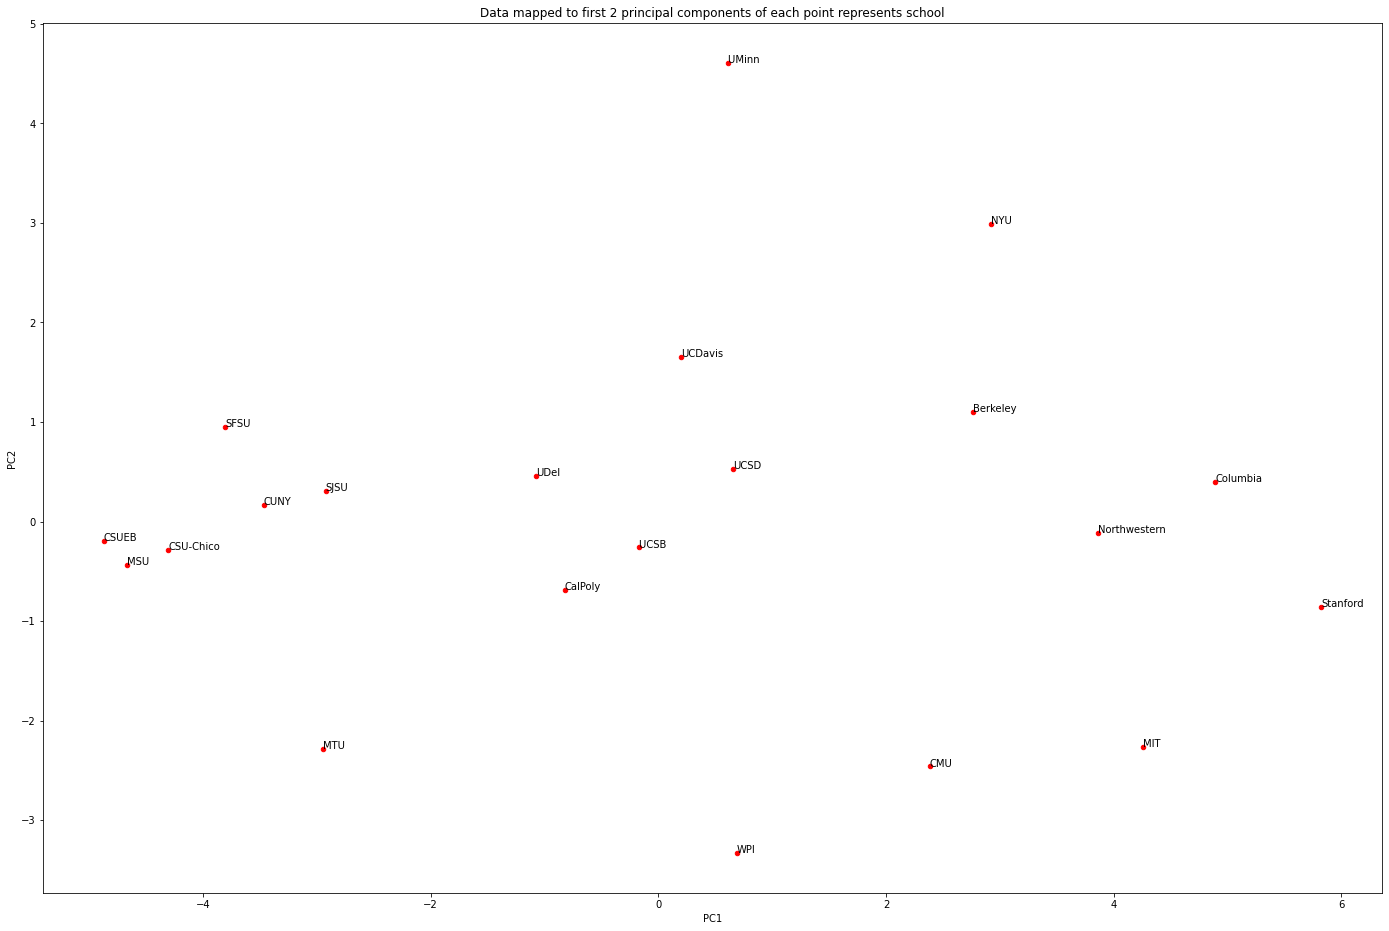

In [ ]:
current_palette = sns.color_palette()
ax = finalDf.plot(x='PC1',y='PC2',c='red',kind='scatter',figsize=(24,16))

plt.title('Data mapped to first 2 principal components of each point represents school')
finalDf[['PC1','PC2','school']].apply(lambda x: ax.text(*x),axis=1)

#### Question-4(c)

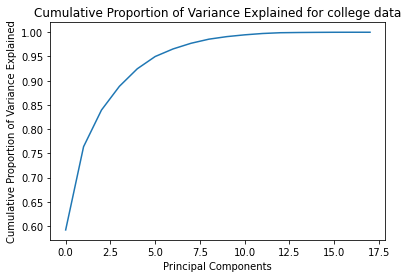

In [ ]:
plt.plot(np.cumsum( pca.explained_variance_ratio_))
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Proportion of Variance Explained")
plt.title('Cumulative Proportion of Variance Explained for college data');


For any further analysis to be done on the data 6 principal  components will be required to get variance around 0.95 

### Stock Data

#### Question-5(a)

In [ ]:
stock1=pd.read_csv("stock_data_2020.csv")
scaler = StandardScaler()
scaler.fit(stock1.iloc[:,1:32])
stock1Scaled = scaler.transform(stock1.iloc[:,1:32])

In [ ]:
pca1= PCA()
X= pca1.fit_transform(stock1Scaled)
Xnew = pd.DataFrame(X)

#### Question-5(b)

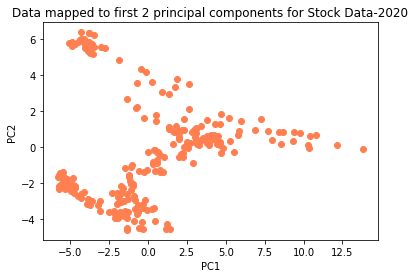

In [ ]:
plt.scatter(X[:,0], X[:,1],c='coral')
#plt(figsize=(16,6), color=['green', 'brown'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Data mapped to first 2 principal components for Stock Data-2020');

#### Question-5(c)

The data pattern for stock data 2020 is low degree of positive, negative correlation  and perfect positive ,negative corbased on types of stocks 


#### Question-5(d)

In [ ]:
stock2=pd.read_csv("stock_data_2019.csv")
scaler = StandardScaler()
scaler.fit(stock2.iloc[:,1:32])
stock2Scaled = scaler.transform(stock2.iloc[:,1:32])


In [ ]:
pca2= PCA()
Y= pca2.fit_transform(stock2Scaled)
Ynew = pd.DataFrame(Y)

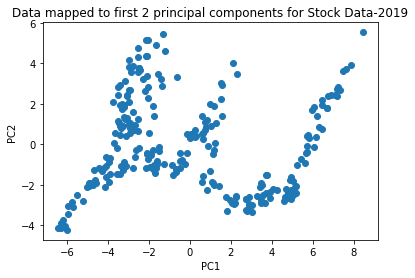

In [ ]:
plt.scatter(Y[:,0], Y[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Data mapped to first 2 principal components for Stock Data-2019');

The data pattern for stock data-2019 is positive correlation and curve linear relationship

### Question 6.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('drive/MyDrive/p5-data/sotu/party.txt', names=['Party', 'Name', 'Date'])

In [ ]:
corpus = []

for i in range(1, 232):
    file_path = 'drive/MyDrive/p5-data/sotu/files/'+"a"+str(i)+'.txt'

    with open(file_path) as f:
        speech = ' '.join(f.read().splitlines())
        corpus.append(speech)
        f.close()

In [ ]:
import string 

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(nltk.corpus.stopwords.words('english'))

corpusNew = list()
for i in range(0, len(corpus)):
    tokens = nltk.tokenize.word_tokenize(corpus[i])
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    words = [w for w in words if not w in stop_words]

    corpusNew.append(' '.join(words))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df["Speeches"] = corpusNew
test = df.loc[(df['Date'] == 2017) | (df['Date'] == 2014) | (df['Date'] == 2006) | (df['Date'] == 1995) | (df['Date'] == 1962)]
train = pd.concat([df, test, test]).drop_duplicates(keep=False)

In [ ]:
train = train.loc[(train['Party'] == 'd') | (train['Party'] == 'r')]

#### This is (a) and (b) combined

In [ ]:
df

,Party,Name,Date,Speeches
0,n,washington,1790,embrace great satisfaction opportunity present...
1,n,washington,1790,fellowcitizens senate house representatives me...
2,n,washington,1791,fellowcitizens senate house representatives va...
3,n,washington,1792,fellowcitizens senate house representatives ab...
4,n,washington,1793,fellowcitizens senate house representatives si...
...,...,...,...,...
226,d,obama,2013,mr speaker mr vice president members congress ...
227,d,obama,2014,mr speaker mr vice president members congress ...
228,d,obama,2015,mr speaker mr vice president members congress ...
229,d,obama,2016,mr speaker mr vice president members congress ...


In [ ]:
from nltk import FreqDist

train_speeches = train["Speeches"].to_list()
train_speeches = ' '.join(train_speeches)
tokens = nltk.word_tokenize(train_speeches)
fdist = FreqDist(tokens)
#common_3000 = fdist.most_commont(3000)
common_3000 = [word[0] for word in fdist.most_common(3000)]

In [ ]:
reduced_speeches_train = []
for speech in train["Speeches"]:
    tokens = nltk.word_tokenize(speech)
    temp_speech = [ word for word in tokens if word in common_3000]
    temp_speech = ' '.join(temp_speech)
    reduced_speeches_train.append(temp_speech)
train["Speeches"] = reduced_speeches_train

In [ ]:
reduced_speeches_test = []
for speech in test["Speeches"]:
    tokens = nltk.word_tokenize(speech)
    temp_speech_test = [ word for word in tokens if word in common_3000]
    temp_speech_test = ' '.join(temp_speech_test)
    reduced_speeches_test.append(temp_speech_test)
test["Speeches"] = reduced_speeches_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
test

,Party,Name,Date,Speeches
174,d,kennedy,1962,mr vice president old new speaker john members...
208,d,clinton,1995,mr speaker mr vice president members th congre...
219,r,bush,2006,mr speaker vice president members congress mem...
227,d,obama,2014,mr speaker mr vice president members congress ...
230,r,trump,2017,thank much mr speaker mr vice president member...


In [ ]:
vectorizer = CountVectorizer(input='content')
X = vectorizer.fit_transform(reduced_speeches_train)

# create Document-Term Matrix / DataFrame
Xframe = pd.DataFrame(X.toarray(),
                      index=["a"+str(i)+".txt" for i in range(1, 179)], 
                      columns=vectorizer.get_feature_names())
Xframe.iloc[0:10,0:5]

,abandon,abandoned,ability,able,abroad
a1.txt,1,1,1,2,0
a2.txt,0,1,3,3,0
a3.txt,0,3,1,0,2
a4.txt,2,0,0,1,2
a5.txt,0,0,0,3,2
a6.txt,2,0,2,5,1
a7.txt,1,0,1,1,0
a8.txt,0,0,1,4,2
a9.txt,0,2,1,2,1
a10.txt,0,2,0,2,2


#### Part c). ii). Bernoulli model of Naive Bayes

In [ ]:
vectorizer = CountVectorizer(input='content')
X_train = vectorizer.fit_transform(train['Speeches']) 

In [ ]:
from sklearn.naive_bayes import BernoulliNB
y_train = train['Party']
clf = BernoulliNB()
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.8258426966292135

In [ ]:
X_test = vectorizer.transform(test['Speeches'])
y_test = test['Party']
clf.score(X_test, y_test)

0.6

In [ ]:
probs = clf.predict_proba(X_test)

In [ ]:
clf.predict(X_test)

array(['d', 'd', 'd', 'd', 'd'], dtype='<U1')

In [ ]:
probs_d = [prob[0] for prob in probs]
probs_r = [prob[1] for prob in probs]
prob_report = pd.DataFrame(list(zip(probs_d, probs_r)), index=test["Name"], columns=['Democrats', ' Republicans'])
prob_report

,Democrats,Republicans
Name,,
kennedy,1.0,3.228986e-08
clinton,1.0,5.338615e-25
bush,1.0,6.342661e-20
obama,1.0,3.849080e-28
trump,1.0,2.293779e-22


#### Part c). iii) Multinomial model of Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf_mnb = MultinomialNB()
clf_mnb.fit(X_train, y_train)
clf_mnb.score(X_train, y_train)

0.7696629213483146

In [ ]:
clf_mnb.predict(X_test)

array(['d', 'd', 'd', 'd', 'd'], dtype='<U1')

In [ ]:
probs = clf_mnb.predict_proba(X_test)
probs_d = [prob[0] for prob in probs]
probs_r = [prob[1] for prob in probs]
prob_report = pd.DataFrame(list(zip(probs_d, probs_r)), index=test["Name"], columns=['Democrats', ' Republicans'])
prob_report

,Democrats,Republicans
Name,,
kennedy,1.0,1.110083e-49
clinton,1.0,1.137959e-112
bush,1.0,1.823232e-30
obama,1.0,1.700928e-152
trump,1.0,1.041815e-48


#### Question-7

In [ ]:
def pre_processing(df):

	""" partioning data into features and target """

	X = df.drop([df.columns[-1]], axis = 1)
	y = df[df.columns[-1]]

	return X, y

In [ ]:
 def tokenize(self, document):
    """
    Take in a document and return a list of words
    """
    doc = document.lower()
    # remove non-alpha characters
    stop_chars = '''0123456789!()-[]{};:'"\,<>./?@#$%^&*_~'''
 
    tokens = ""
    # iterate through and make each token
    for char in doc:
      if char not in stop_chars:
        tokens += char
        
    return tokens.split() # now a list of tokens

In [ ]:
def prior_prob(self, counts):
    
    # Iterate through counts dict and add up each word count by category
    cat0_word_count = cat1_word_count = 0
    for word, (cat0_count, cat1_count) in counts.items():
        cat0_word_count += cat0_count
        cat1_word_count += cat1_count

    # save attributes to the class
    self.cat0_count = cat0_word_count
    self.cat1_count = cat1_word_count
    self.total_count = self.cat0_count + self.cat1_count

    # Get the prior prob by dividing words in each cat by total words
    cat_0_prior = cat0_word_count / self.total_count
    cat_1_prior = cat1_word_count / self.total_count
    return cat_0_prior, cat_1_prior

In [ ]:
import numpy as np 

class MNNaiveBayes:
    """
    This class is written with the standard python library and NumPy.
    The goal is to recreate a multinomial Naive Bayes classifcation model from scratch.
    
    Usage:
    1. Instantiate the model
    2. Fit it on a corpus of documents and an array of their binary classifications
    3. Predict on another corpus to get an array of binary classes
    """
    def __init__(self, k=0.5):
      self.k = k
      self.cat0_count = 0
      self.cat1_count = 0
      self.total_count = self.cat0_count + self.cat1_count
      self.cat_0_prior = 0
      self.cat_1_prior = 0
      self.cat_0_prior, self.cat_1_prior
      self.word_probs = []
      self.vocab = []

    def tokenize(self, document):
      """
      Take in a document and return a list of words
      """
      doc = document.lower()
      # remove non-alpha characters
      stop_chars = '''0123456789!()-[]{};:'"\,<>./?@#$%^&*_~'''
      
      tokens = ""
      # iterate through and make each token
      for char in doc:
        if char not in stop_chars:
          tokens += char

      return tokens.split() # now a list of tokens
    
    def count_words(self, X, y):
      """
      X is an array of documents
      y is an array of targets, 0 or 1
      Output a dictionary of {word: (cat0_count, cat1_count)...}
      """
      counts = {}
      # need to figure our this loop, want to iterate over both of them, I see why it was paired before
      for document, category in zip(X, y):
          for token in self.tokenize(document):
            print(token)
            # Initialize a dict entry with 0 counts
            if token not in counts:
              counts[token] = [0,0]
            # Now that it exists, add to the category count for that word
            counts[token][category] += 1
      return counts

    def prior_prob(self, counts):
      
      # Iterate through counts dict and add up each word count by category
      cat0_word_count = cat1_word_count = 0
      for word, (cat0_count, cat1_count) in counts.items():
          cat0_word_count += cat0_count
          cat1_word_count += cat1_count

      # save attributes to the class
      self.cat0_count = cat0_word_count
      self.cat1_count = cat1_word_count
      self.total_count = self.cat0_count + self.cat1_count

      # Get the prior prob by dividing words in each cat by total words
      cat_0_prior = cat0_word_count / self.total_count
      cat_1_prior = cat1_word_count / self.total_count
      return cat_0_prior, cat_1_prior

    def word_probabilities(self, counts):
      """turn the word_counts into a list of triplets
      word, p(w | cat0), and p(w | cat1)"""
      # Here we apply the smoothing term, self.k, so that words that aren't in
      # the category don't get calculated as 0
      self.vocab = [word for word, (cat0, cat1) in counts.items()]
      return [(word,
      (cat0 + self.k) / (self.cat0_count + 2 * self.k),
      (cat1 + self.k) / (self.cat1_count + 2 * self.k))
      for word, (cat0, cat1) in counts.items()]

    def fit(self, X, y):
      # Take all these functions and establish probabilities of input
      counts = self.count_words(X, y)
      self.cat_0_prior, self.cat_1_prior = self.prior_prob(counts)
      self.word_probs = self.word_probabilities(counts)

    def predict(self, test_corpus):
      # Split the text into tokens,
      # For each category: calculate the probability of each word in that cat
      # find the product of all of them and the prior prob of that cat
      y_pred = []
      for document in test_corpus:
        # Every document get their own prediction probability
        log_prob_cat0 = log_prob_cat1 = 0.0
        tokens = self.tokenize(document)
          # Iterate through the training vocabulary and add any log probs that match
          # if no match don't do anything. We just need a score for each category/doc
        for word, prob_cat0, prob_cat1 in self.word_probs:
          if word in tokens:
            # Because of 'overflow' best to add the log probs together and exp
            log_prob_cat0 += np.log(prob_cat0)
            log_prob_cat1 += np.log(prob_cat1)
          # get each of the category predictions including the prior
        cat_0_pred = self.cat_0_prior * np.exp(log_prob_cat0)
        cat_1_pred = self.cat_1_prior * np.exp(log_prob_cat1)
        if cat_0_pred >= cat_1_pred:
          y_pred.append(0)
        else:
          y_pred.append(1)
      return y_pred

In [ ]:
type(y_train)

pandas.core.series.Series

In [ ]:
# our naive bayes from scratch
nb = MNNaiveBayes()
nb.fit(train['Speeches'].to_numpy(), y_train.to_numpy())
nb.predict(X_test)

fellow


TypeError: ignored

In [ ]:
X_train

<178x3000 sparse matrix of type '<class 'numpy.int64'>'
	with 199744 stored elements in Compressed Sparse Row format>

In [ ]:
for document, category in zip(X_train, y_train):
  print(category)

n
n
n
n
n
n
n
n
f
f
f
f
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
d
d
d
d
d
d
d
d
d
d
d
d
w
w
w
w
d
d
d
d
w
w
w
w
d
d
d
d
d
d
d
d
r
r
r
r
d
d
d
d
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
d
d
d
d
r
r
r
r
d
d
d
d
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
d
d
d
d
d
d
d
d
r
r
r
r
r
r
r
r
r
r
r
r
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
d
r
r
r
r
r
r
r
r
r
d
d
d
d
d
d
d
d
r
r
r
r
r
r
r
r
d
d
d
d
r
r
r
r
r
r
r
r
r
r
r
r
d
d
d
d
d
d
d
r
r
r
r
r
r
r
d
d
d
d
d
d
d


### Congress data

### Question-8(a)

#### Part 1).

In [ ]:
cong_116 = pd.read_csv('drive/MyDrive/p5-data/congress/H116_votes.csv')

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
cong_116['PartyCode'].unique()

array([200, 100, 328])

In [ ]:
scaler = StandardScaler()
scaler.fit(cong_116.iloc[:, 8:58])
cong_116_scaled = scaler.transform(cong_116.iloc[:, 8:58])

In [ ]:
pca = PCA()
X1 = pca.fit_transform(cong_116_scaled)

In [ ]:
newDat = pd.DataFrame(X1[:, 0:2], columns=['PC1', 'PC2'])
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(cong_116["PartyCode"])
newDat["PartyCode"] = y
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([235, 203,   1]))

In [ ]:
newDat["PartyCode"].unique()
label_encoder.inverse_transform([0, 2, 1])

array([100, 328, 200])

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:988: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
No handles with labels found to put in legend.


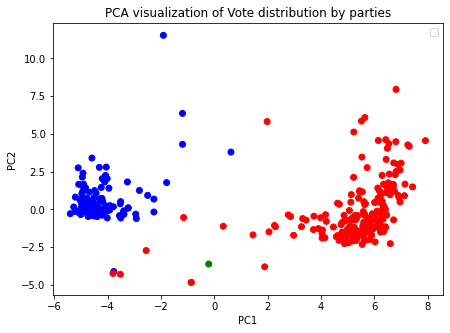

In [ ]:
plt.figure(figsize=(7, 5))

cols = []
for i in y:
    if i == 0:
        cols.append('blue')
    if i == 2:
        cols.append('green')
    if i == 1:
        cols.append('red')
    
sc = plt.scatter(newDat['PC1'], newDat['PC2'], c=cols)
plt.xlabel('PC1')
plt.ylabel('PC2')
Parties = ["Republican", "Democratic", "Independent"]
plt.legend(handles=sc.legend_elements()[0], labels=Parties)
plt.title('PCA visualization of Vote distribution by parties');

In [ ]:
x = newDat.query('PC1 <= -0.75 & PC2 <= -2')
x

,PC1,PC2,PartyCode
32,-3.766850,-4.120722,0
245,-3.798579,-4.250847,1
288,-0.861440,-4.847679,1
289,-2.555200,-2.733043,1
295,-0.861440,-4.847679,1
338,-3.521877,-4.304506,1


#### Part 2.

In [ ]:
x = cong_116.iloc[[32, 245, 289, 338, 288, 295]]
x

,CongNum,icpsr,StateCode,District,StateNm,PartyCode,ICPSRocc,Name,212,653,112,548,439,460,498,720,639,359,141,623,363,201,112.1,631,539,616,399,345,253,279,224,115,255,168,185,22,195,506,160,196,208,508,244,245,244.1,120,61,137,126,721,55,502,388,404,74,231,722,78
32,116,15448,71,12,CALIFOR,100,NaN,PELOSI,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
245,116,91980,12,2,NEW JER,200,NaN,VAN DREW,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
289,116,29546,47,3,NORTH C,200,NaN,JONES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,9,0,0,0,9,0,0,0,9,0,0,0
338,116,21170,14,12,PENNSYL,200,NaN,MARINO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
288,116,21987,47,3,NORTH C,200,NaN,MURPHY,0,6,0,6,0,0,0,6,6,0,0,6,0,0,0,6,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,1,0
295,116,21986,47,9,NORTH C,200,NaN,BISHOP,0,6,0,6,0,0,0,6,6,0,0,6,0,0,0,6,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,1,0


- Van Drew: Changed parties
- Jones: Died 2019
- Marino: Left Congress
- Murphy: Replaced Jones in 2019

#### Question-8(c)

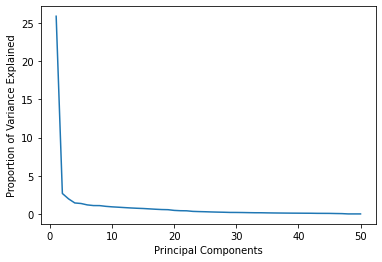

In [ ]:
plt.plot(range(1, len(pca.explained_variance_)+1), pca.explained_variance_)
plt.xlabel("Principal Components")
plt.ylabel("Proportion of Variance Explained");

#### Question-8(d).

In [ ]:
cong_110 = pd.read_csv('drive/MyDrive/p5-data/congress/H110_votes.csv')

In [ ]:
scaler_110 = StandardScaler()
scaler_110.fit(cong_110.iloc[:, 8:58])
cong_110_scaled = scaler_110.transform(cong_110.iloc[:, 8:58])

In [ ]:
pca = PCA()
X1 = pca.fit_transform(cong_110_scaled)

In [ ]:
newDat_110 = pd.DataFrame(X1[:, 0:2], columns=['PC1', 'PC2'])
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(cong_110["PartyCode"])
newDat_110["PartyCode"] = y


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:988: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
No handles with labels found to put in legend.


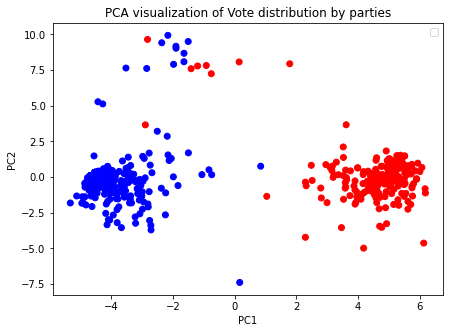

In [ ]:
plt.figure(figsize=(7, 5))
cols = []
for i in y:
    if i == 0:
        cols.append('blue')
    if i == 2:
        cols.append('green')
    if i == 1:
        cols.append('red')
sc = plt.scatter(newDat_110['PC1'], newDat_110['PC2'], c=cols)

plt.xlabel('PC1')
plt.ylabel('PC2')
Parties = ["Republican", "Democratic", "Independent"]
plt.legend(handles=sc.legend_elements()[0], labels=Parties)
plt.title('PCA visualization of Vote distribution by parties');

#### Question-8(e)

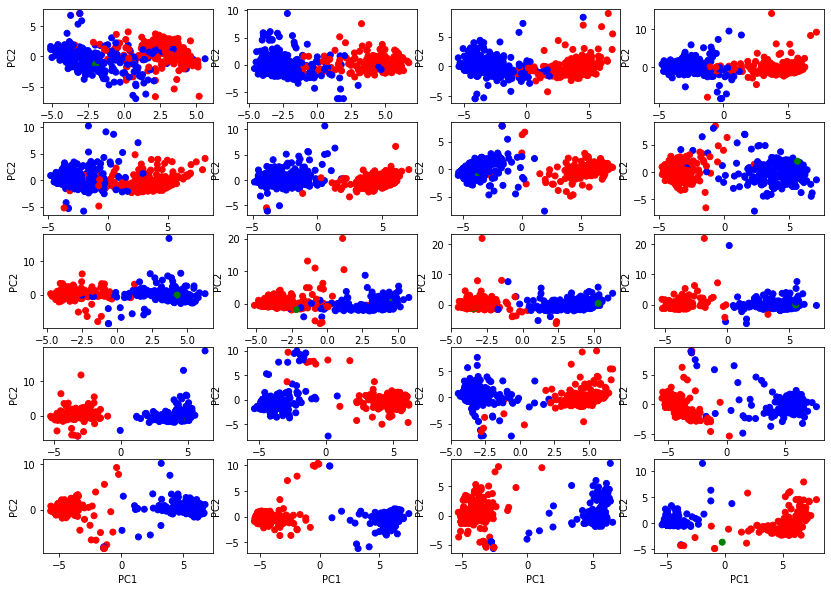

In [ ]:
fig, axs = plt.subplots(5, 4, figsize=(14,10))

paths = []
for i in range(97, 117):
    fp = 'drive/MyDrive/p5-data/congress/H'+ str(i) +'_votes.csv'
    paths.append(fp)
    
x = range(10)
y = range(10)

i = 0

plt.title('PCA visualization of Vote distribution by parties')


for j in range(1, 21):
    cong = pd.read_csv(paths[i])
    scaler_temp = StandardScaler()
    scaler_temp.fit(cong.iloc[:, 8:58])
    cong_scaled = scaler_temp.transform(cong.iloc[:, 8:58])
    pca = PCA()
    X1 = pca.fit_transform(cong_scaled)
    newDat_temp = pd.DataFrame(X1[:, 0:2], columns=['PC1', 'PC2'])
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(cong["PartyCode"])
    newDat_temp["PartyCode"] = y
    plt.subplot(5, 4, j)
    
    temp = []
    for k in y:
        if k == 0:
            temp.append('blue')
        if k == 2:
            temp.append('green')
        if k == 1:
            temp.append('red')
            
    plt.scatter(newDat_temp['PC1'], newDat_temp['PC2'], c=temp)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    i += 1
        
        

The **Red** represents **Republicans** and **Blue** represents **Democrats**.
In the above plot we start from the earliest senate on the top-left to the latest senate in bottom-right.

As you can see in the plot above the house was not so divided on party lines always, but in the recent few years the distinction is very clear